<a href="https://colab.research.google.com/github/VidhanNahata/Shopper_spectrum-/blob/main/Shopping_Spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Shopper spectrum



##### **Project Type**    -Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

The rapid expansion of the global e-commerce industry has resulted in the generation of immense volumes of transactional data every day. This data not only reflects a company's sales activities but also holds significant potential for uncovering deep insights into consumer purchasing behavior. By systematically analyzing transaction data, businesses can identify customer preferences, buying habits, and emerging market trends, informing strategic decisions and providing tailored experiences that fuel both customer satisfaction and sustained business growth.

A central challenge within this context is to segment customers effectively and recommend products they are more likely to purchase. Segmentation is crucial because not all customers have the same value to a business. Understanding and classifying customers based on their interactions and monetary contributions allows companies to allocate resources more efficiently and design targeted marketing campaigns. One robust and widely used technique for this purpose is RFM (Recency, Frequency, and Monetary) analysis.

RFM analysis breaks down customer behavior into three key dimensions:

Recency refers to how recently a customer has made a purchase, signaling ongoing engagement and propensity to buy again.

Frequency measures how often a customer purchases within a given period, highlighting repeat buyers versus one-time shoppers.

Monetary evaluates the total amount a customer has spent, identifying high-value individuals who substantially impact revenue.

By scoring customers along these three axes and clustering them into meaningful segments (such as loyal customers, potential loyalists, and at-risk customers), businesses can prioritize retention efforts, upsell strategies, and personalized promotions with higher precision.

Beyond segmentation, personalized product recommendations have become integral to modern e-commerce platforms. Recommender systems help customers discover products they might not otherwise find, improving the shopping experience and encouraging additional purchases. Among the various techniques used, collaborative filtering stands out for its effectiveness. Collaborative filtering leverages the wisdom of the crowd by analyzing patterns in user behavior and identifying similarities between users or items.

This approach generally falls into two categories:

User-based collaborative filtering: Recommends products to a user based on what similar users have liked or purchased.

Item-based collaborative filtering: Suggests items similar to those a user has interacted with, based on aggregate patterns across the user base.

By applying collaborative filtering to e-commerce transaction data, platforms can deliver highly relevant product suggestions, even in the absence of explicit user preferences. These recommendations can increase conversion rates, average order values, and foster long-term customer loyalty.

Integrating RFM-based segmentation with collaborative filtering further refines personalization. For example, different customer segments may receive tailored product recommendations or marketing messages: high-value repeat buyers could receive early access to new arrivals, while recent but infrequent purchasers might get bundled offers to encourage repeat business. Such granularity increases the effectiveness of marketing interventions and ensures that resources are focused where they are likely to deliver maximum impact.

The effectiveness of these methods hinges on rigorous data preprocessing, including handling missing values, removing anomalies, and structuring the data for meaningful interpretation. Visualization techniques such as heatmaps, cluster plots, and time-series analyses can make sense of complex behavioral patterns and demonstrate the distinctiveness of discovered segments.

In summary, the project explores a holistic approach to leveraging e-commerce transaction data, combining RFM segmentation with collaborative filtering to unlock the full potential of customer analytics. This dual strategy not only improves the relevance of product recommendations but also empowers businesses to nurture profitable customer relationships, boosting both customer satisfaction and revenue growth. By continuously refining these models using fresh data and feedback, e-commerce businesses can maintain a competitive edge in today’s data-driven marketplace.

# **GitHub Link -**

https://github.com/VidhanNahata/Shopper_spectrum-

# **Problem Statement**


The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [108]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [109]:
df = pd.read_csv('online_retail.csv')


### Dataset First View

In [110]:

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [111]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [113]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2023-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


#### Duplicate Values

In [114]:
# Dataset Duplicate Value Count
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 5268


#### Missing Values/Null Values

In [115]:
# Missing Values/Null Values Count
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [116]:
df.duplicated().sum()

np.int64(5268)

In [117]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [118]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [119]:
df['Country'].value_counts()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


### What did you know about your dataset?

It contains 541,909 rows and 8 columns.

The columns are: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.

There are 5,268 duplicate rows.

There are missing values in the Description (1454 missing values) and CustomerID (135080 missing values) columns.

The data types are a mix of object, int64, and float64. The InvoiceDate column is currently an object type and will need to be converted to a datetime object for time-based analysis.

The Quantity column contains negative values, indicating potential returns or cancellations.

The UnitPrice column contains zero and negative values, which may need investigation.

The Country column contains data for 38 different countries, with the 'United Kingdom' being the most frequent.


### DROPPING ROWS WITH MISSING CUSTOMERID

In [120]:
df.dropna(subset=['CustomerID'], inplace=True)

In [121]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


In [122]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


DROPPING DUPLICATED DATA

In [123]:
df.duplicated().sum()

df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

EXCLUDE CANCELLED INVOICES(INVOICE_NO STARTING WITH 'C')

In [124]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df['InvoiceNo'].value_counts()

,count
InvoiceNo,
576339,542
579196,533
580727,529
578270,442
573576,435
...,...
581491,1
581487,1
581483,1


REMOVE NEGATIVE OR ZERO QUANTITIES AND PRICES

In [125]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


# EXPLORATORY DATA ANALYSIS(EDA)

In [126]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

### Analyze transaction volume by country


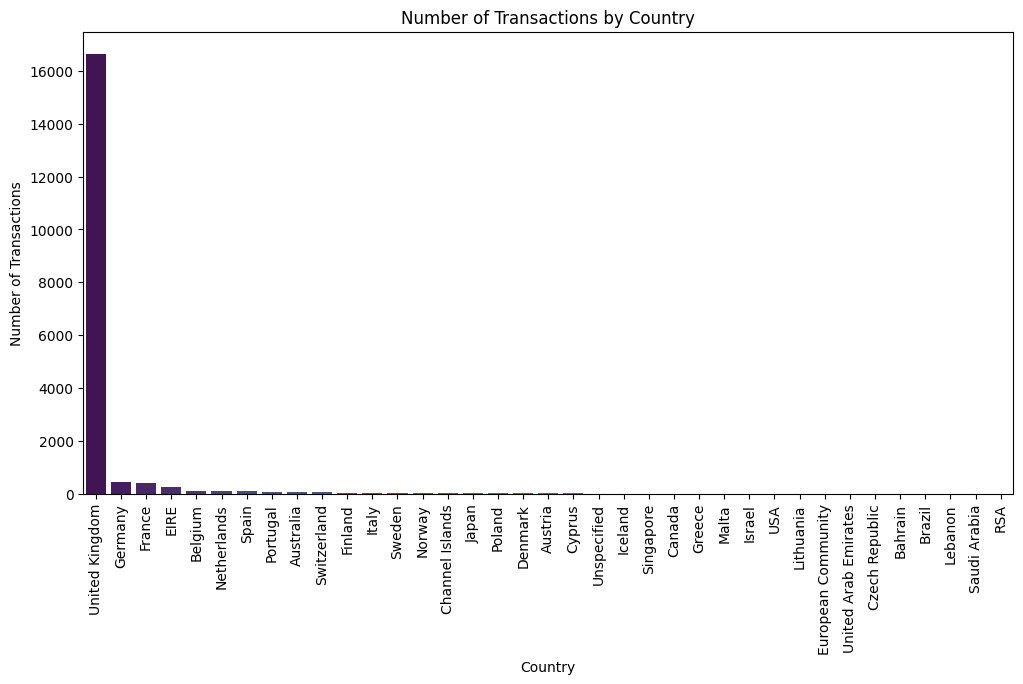

In [127]:
trans_by_country = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=trans_by_country.index, y=trans_by_country.values, palette='viridis')
plt.title('Number of Transactions by Country')
plt.xticks(rotation=90)
plt.ylabel('Number of Transactions')
plt.show()

### Identify top-selling products

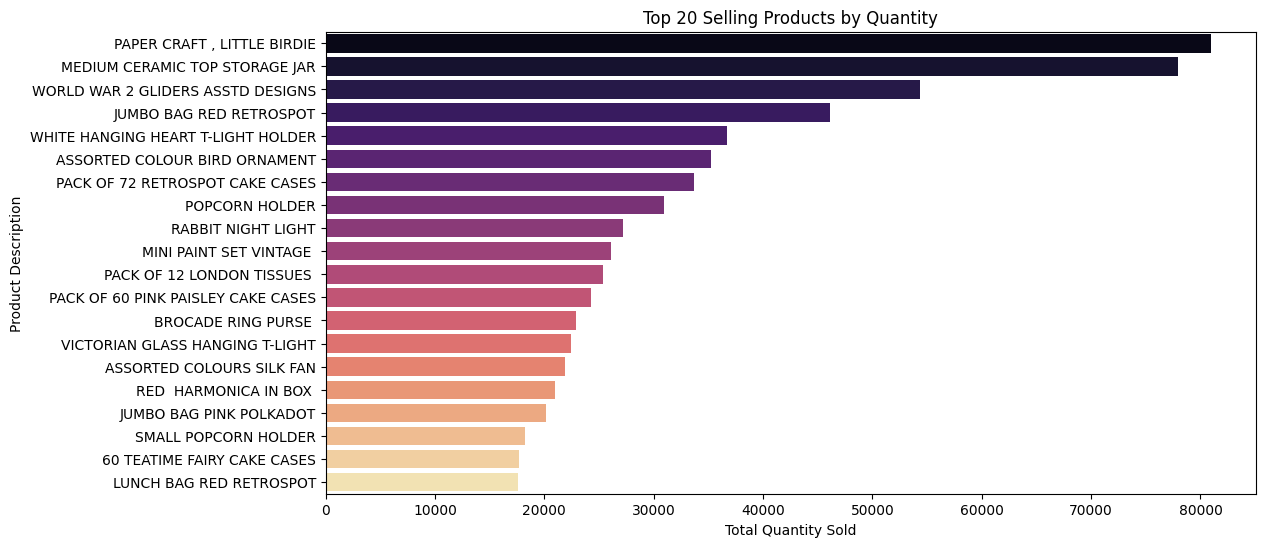

In [128]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(y=top_products.index, x=top_products.values, palette='magma')
plt.title('Top 20 Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

### Visualize purchase trends over time

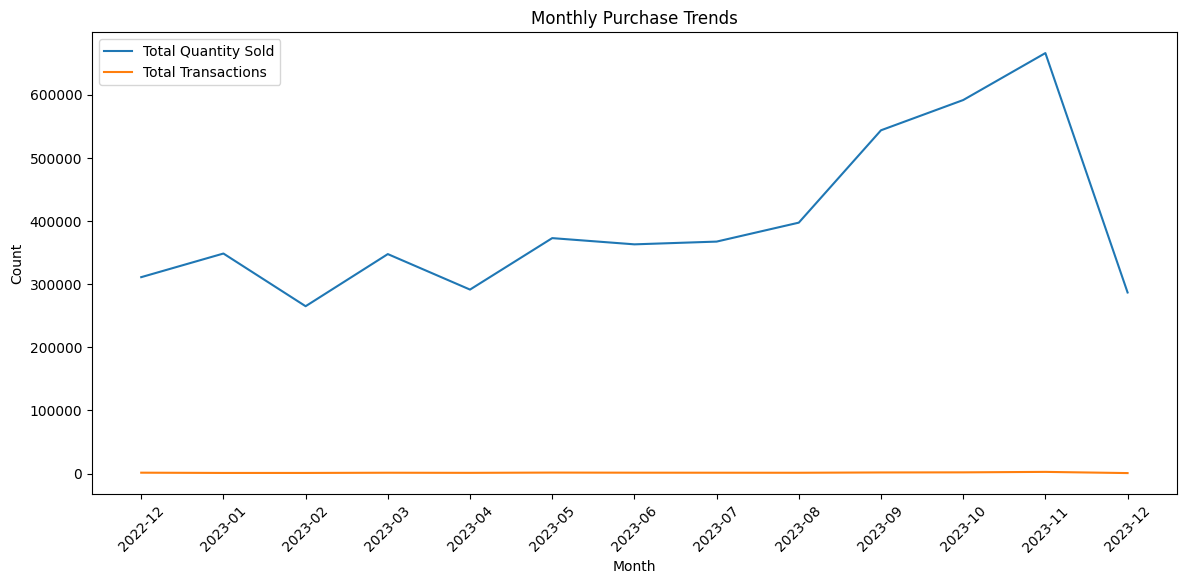

In [129]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Quantity'].sum()
monthly_transactions = df.groupby('Month')['InvoiceNo'].nunique()

plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, label='Total Quantity Sold')
sns.lineplot(x=monthly_transactions.index.astype(str), y=monthly_transactions.values, label='Total Transactions')
plt.xticks(rotation=45)
plt.title('Monthly Purchase Trends')
plt.ylabel('Count')
plt.legend()
plt.show()

### Inspect monetary distribution per transaction and customer


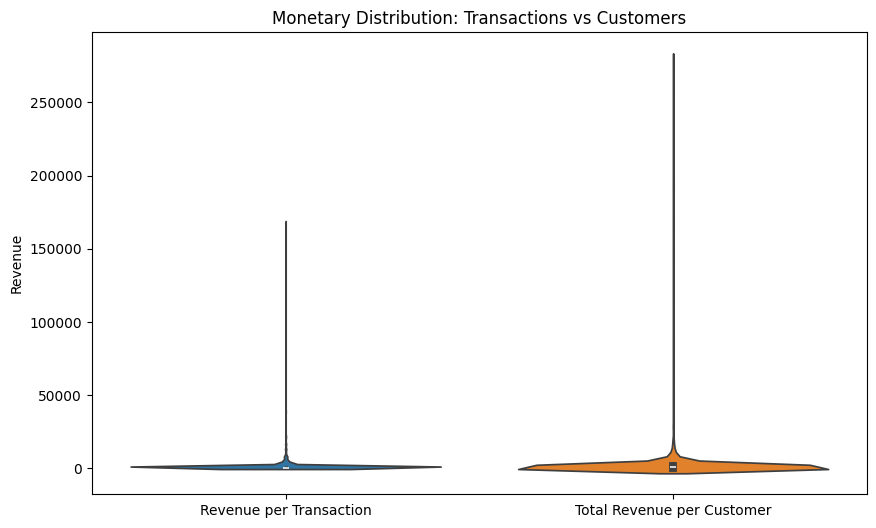

In [130]:
# Calculate TotalPrice for each row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Calculate Revenue per Transaction
transaction_revenue = df.groupby('InvoiceNo')['TotalPrice'].sum()

# Calculate Total Revenue per Customer
customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum()

monetary_data = [
    transaction_revenue.values,        # Revenue per Transaction
    customer_revenue.dropna().values   # Revenue per Customer
]

plt.figure(figsize=(10,6))
sns.violinplot(data=monetary_data, palette=['#1f77b4', '#ff7f0e'])
plt.xticks([0, 1], ['Revenue per Transaction', 'Total Revenue per Customer'])
plt.title('Monetary Distribution: Transactions vs Customers')
plt.ylabel('Revenue')
plt.show()

### RFM distributions


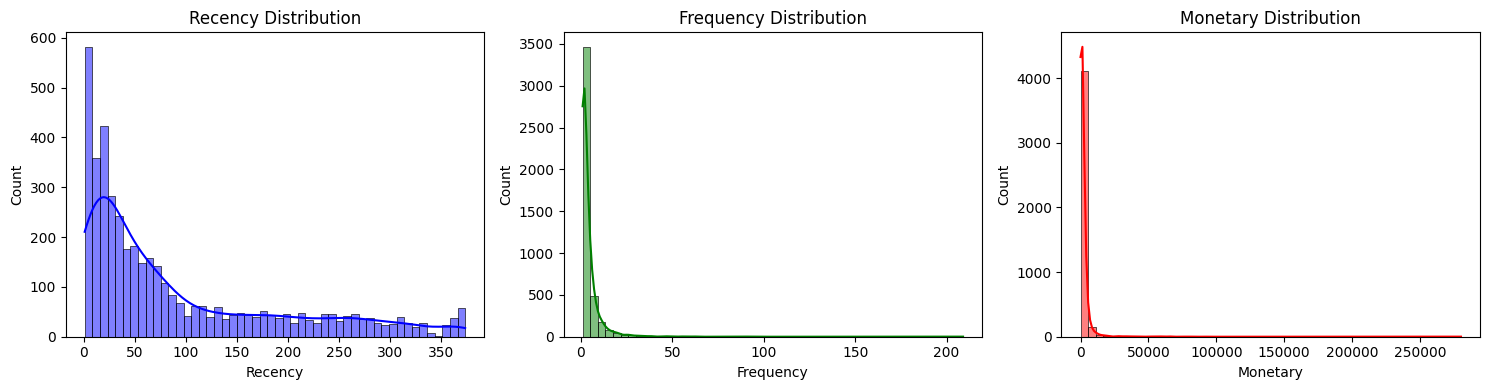

In [131]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Plot RFM distributions
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins=50, color='blue', kde=True)
plt.title('Recency Distribution')

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=50, color='green', kde=True)
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins=50, color='red', kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

### Elbow curve for cluster selection

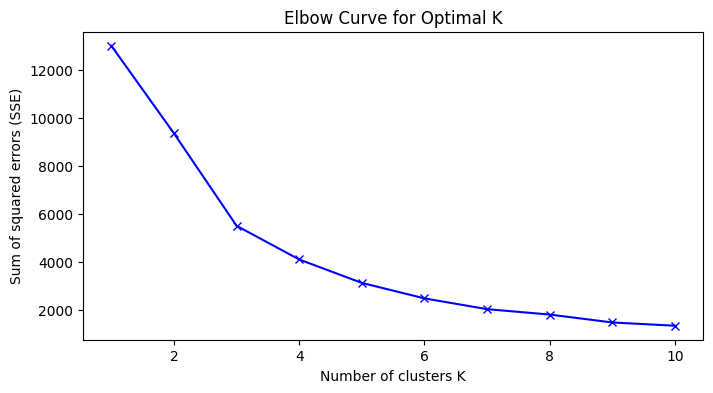

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

rfm_scaled = rfm[['Recency', 'Frequency', 'Monetary']].copy()

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_scaled)

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Curve for Optimal K')
plt.show()

### Customer cluster profiles


        Recency        Frequency         Monetary                
           mean median      mean median      mean    median count
Cluster                                                          
0          43.7   32.0       3.7    3.0    1353.6     826.3  3054
1         248.1  243.0       1.6    1.0     478.8     310.3  1067
2           7.4    2.0      82.5   63.0  127188.0  117210.1    13
3          15.5    5.0      22.3   19.0   12690.5    7990.2   204


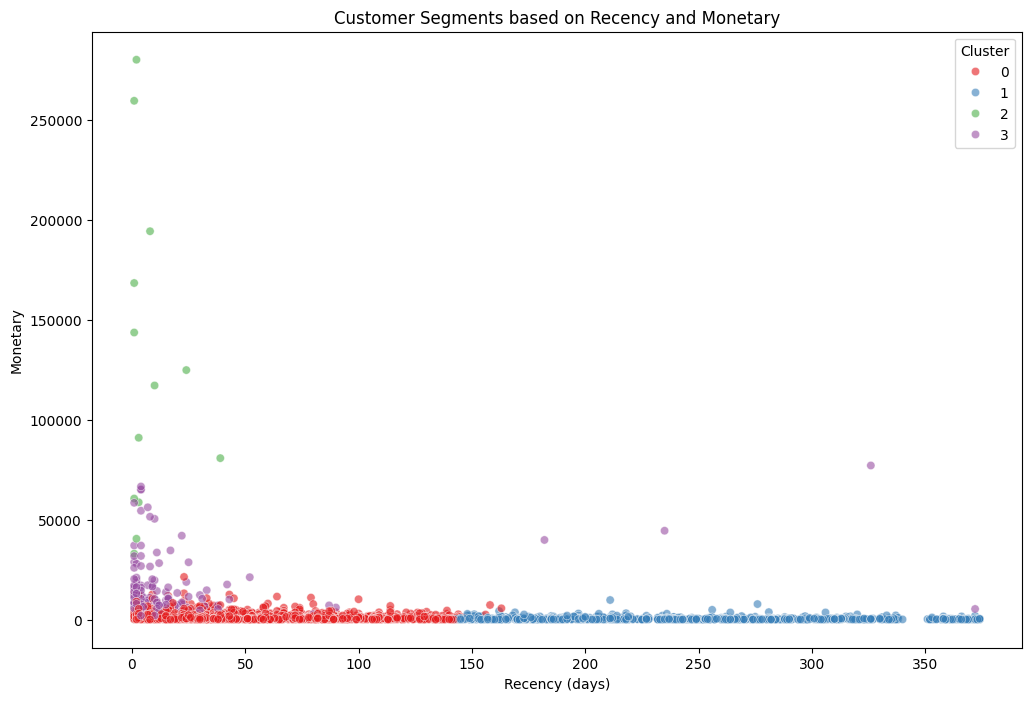

In [133]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10) # Added n_init for clarity and to avoid warning
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Summary stats per cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'count']
}).round(1)
print(cluster_summary)

# Visualize clusters
plt.figure(figsize=(12,8))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set1', alpha=0.6)
plt.title('Customer Segments based on Recency and Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary')
plt.show()

### Product recommendation heatmap / similarity matrix

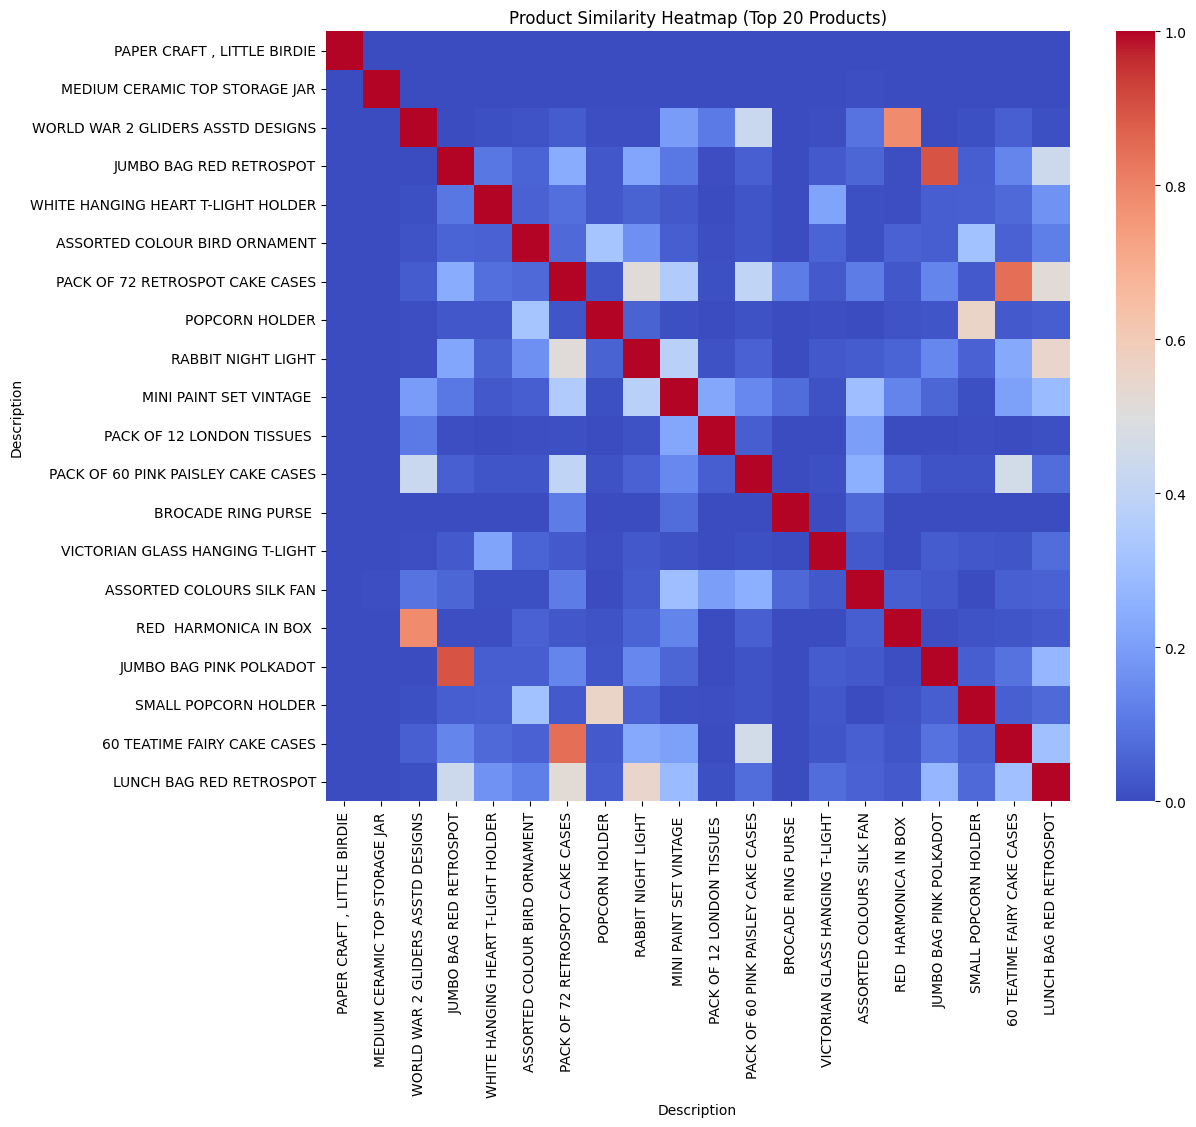

In [134]:
customer_product = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)

# Compute cosine similarity between products
from sklearn.metrics.pairwise import cosine_similarity
product_sim = cosine_similarity(customer_product.T)
product_sim_df = pd.DataFrame(product_sim, index=customer_product.columns, columns=customer_product.columns)

# For visualization, pick top 20 products by total sales
top_20_products = top_products.index.tolist()
sim_subset = product_sim_df.loc[top_20_products, top_20_products]

plt.figure(figsize=(12,10))
sns.heatmap(sim_subset, cmap='coolwarm', annot=False)
plt.title('Product Similarity Heatmap (Top 20 Products)')
plt.show()

# Clustering Methodology:


### Feature Engineering:

In [135]:
import pandas as pd
from datetime import timedelta

# Load data and preprocess
df = pd.read_csv('online_retail.csv', encoding='latin1')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove cancelled transactions (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Set snapshot date for Recency calculation (one day after last purchase date)
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

# Calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique'                                   # Frequency
})

rfm['Monetary'] = df.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# Rename columns for clarity
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency'}, inplace=True)

print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40


### Standardize/Normalize the RFM values

In [136]:
from sklearn.preprocessing import StandardScaler

# Standardize RFM columns (Recency, Frequency, Monetary)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Optionally, inspect the scaled data
import numpy as np
print(np.round(rfm_scaled[:5], 2))

[[ 2.33 -0.42  8.36]
 [-0.91  0.35  0.25]
 [-0.18 -0.04 -0.03]
 [-0.74 -0.42 -0.03]
 [ 2.17 -0.42 -0.19]]


### Choose Clustering Algorithm (KMeans, DBScan, Hierarchial etc)

### KMeans Clustering

In [137]:
from sklearn.cluster import KMeans

k = 5  # Update this with your chosen value based on elbow/silhouette analysis
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(rfm_scaled)
rfm['KMeans_Cluster'] = kmeans.labels_

print("KMeans Cluster assignments (first 5):")
print(rfm['KMeans_Cluster'].head())

# Optionally: Plot cluster centers (in scaled data)
print("KMeans cluster centers (scaled RFM):")
print(kmeans.cluster_centers_)

KMeans Cluster assignments (first 5):
CustomerID
12346.0    2
12347.0    0
12348.0    0
12349.0    0
12350.0    1
Name: KMeans_Cluster, dtype: int32
KMeans cluster centers (scaled RFM):
[[-0.6375548   0.0433541  -0.03429872]
 [ 1.92049086 -0.37830737 -0.17269695]
 [-0.78997987  4.03905887  2.23783938]
 [ 0.37309204 -0.28330591 -0.14330239]
 [-0.85805562  7.95621297 20.26099812]]


### DBScan clustering

In [138]:
from sklearn.cluster import DBSCAN

# You may need to tune eps and min_samples depending on your data distribution
dbscan = DBSCAN(eps=1, min_samples=5)
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)

print("DBSCAN Cluster assignments (first 5):")
print(rfm['DBSCAN_Cluster'].head())
print("DBSCAN labels unique:", set(rfm['DBSCAN_Cluster']))

DBSCAN Cluster assignments (first 5):
CustomerID
12346.0   -1
12347.0    0
12348.0    0
12349.0    0
12350.0    0
Name: DBSCAN_Cluster, dtype: int64
DBSCAN labels unique: {0, -1}


### Hierarchial clusteing

In [139]:
from sklearn.cluster import AgglomerativeClustering

# Try different n_clusters; start with 4 for consistency with KMeans
agg = AgglomerativeClustering(n_clusters=4)
rfm['Hierarchical_Cluster'] = agg.fit_predict(rfm_scaled)

print("Hierarchical Cluster assignments (first 5):")
print(rfm['Hierarchical_Cluster'].head())

Hierarchical Cluster assignments (first 5):
CustomerID
12346.0    3
12347.0    1
12348.0    1
12349.0    1
12350.0    2
Name: Hierarchical_Cluster, dtype: int64


# Using Elbow Method , Silhouette Score to decide the number of clusters

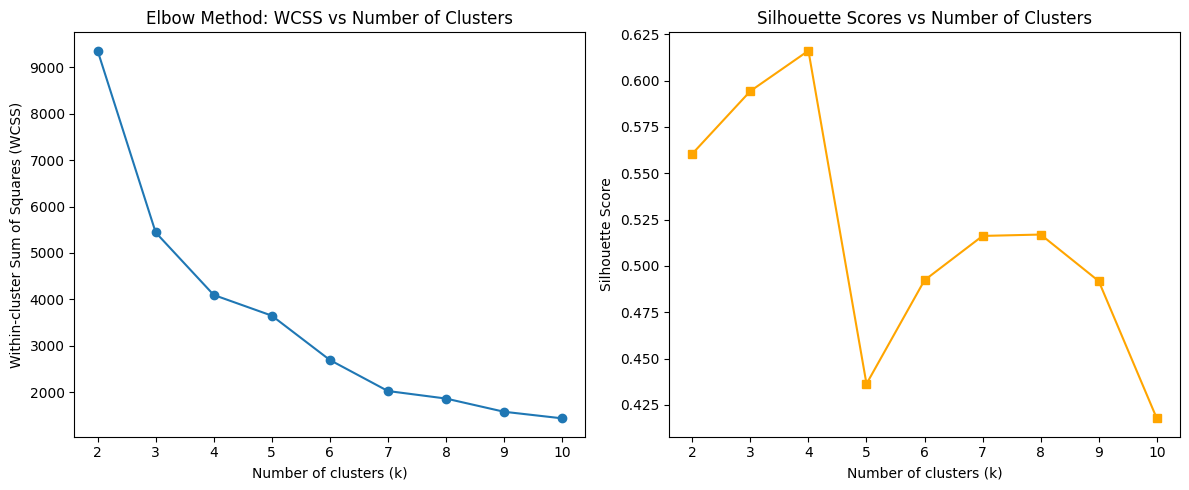

In [140]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Import silhouette_score

sse = []
silhouette_scores = []
k_range = range(2, 11)  # Testing cluster counts from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)

    sse.append(kmeans.inertia_)  # Sum of squared distances (WCSS)

    labels = kmeans.labels_
    sil_score = silhouette_score(rfm_scaled, labels)
    silhouette_scores.append(sil_score)

# Plot Elbow Curve and Silhouette Scores side-by-side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method: WCSS vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='s', color='orange')
plt.title('Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Run Clustering


### kmean clustering

In [141]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)



In [142]:
print("First 10 customers with cluster assignment:")
print(rfm[['Recency', 'Frequency', 'Monetary', 'Cluster']].head(10))

# Print the number of customers in each cluster
print("\nCustomer count per cluster:")
print(rfm['Cluster'].value_counts())

# Print average RFM values per cluster to help with labeling
print("\nCluster RFM Averages:")
print(rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2))

First 10 customers with cluster assignment:
            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346.0         326          1  77183.60        0
12347.0           2          7   4310.00        3
12348.0          75          4   1797.24        3
12349.0          19          1   1757.55        3
12350.0         310          1    334.40        1
12352.0          36          8   2506.04        3
12353.0         204          1     89.00        1
12354.0         232          1   1079.40        1
12355.0         214          1    459.40        1
12356.0          23          3   2811.43        3

Customer count per cluster:
Cluster
3    3053
1    1062
0     211
2      13
Name: count, dtype: int64

Cluster RFM Averages:
         Recency  Frequency   Monetary
Cluster                               
0          15.67      22.05   12453.23
1         248.56       1.55     478.11
2           7.38      82.69  127338.31
3          43.91       3.66    1349

### DBScan clustering

In [143]:
print(rfm.groupby('DBSCAN_Cluster')[['Recency', 'Frequency', 'Monetary']].mean())


                  Recency  Frequency      Monetary
DBSCAN_Cluster                                    
-1              39.606061  56.151515  75805.919394
 0              92.923827   3.874361   1488.577000


### Hierarchial clustering

In [144]:
print(rfm.groupby('Hierarchical_Cluster')[['Recency', 'Frequency', 'Monetary']].mean())


                         Recency  Frequency       Monetary
Hierarchical_Cluster                                      
0                       6.733333  83.600000  111916.309333
1                      47.623750   3.724687    1357.658785
2                     259.542677   1.489989     457.307820
3                      15.051429  22.565714   14023.828743


In [145]:
# Compute relevant quantiles
recency_q = rfm['Recency'].quantile([0.25, 0.75])
frequency_q = rfm['Frequency'].quantile([0.25, 0.75])
monetary_q = rfm['Monetary'].quantile([0.25, 0.75])

def label_row(row):
    r, f, m = row['Recency'], row['Frequency'], row['Monetary']
    if r <= recency_q[0.25] and f >= frequency_q[0.75] and m >= monetary_q[0.75]:
        return 'High-Value'
    elif f >= frequency_q[0.25] and m >= monetary_q[0.25]:
        return 'Regular'
    elif f <= frequency_q[0.25] and m <= monetary_q[0.25] and r >= recency_q[0.75]:
        return 'Occasional'
    elif r >= recency_q[0.75] and f <= frequency_q[0.25] and m <= monetary_q[0.25]:
        return 'At-Risk'
    else:
        return 'Other'

rfm['Segment'] = rfm.apply(label_row, axis=1)


# Visualizing the clusters

### 2D Scatter Plot: Recency vs. Monetary

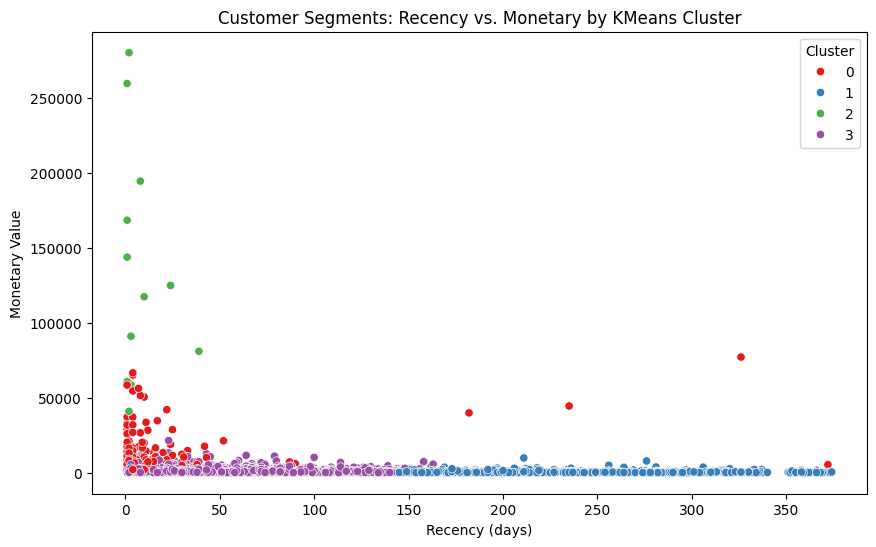

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set1')
plt.title("Customer Segments: Recency vs. Monetary by KMeans Cluster")
plt.xlabel("Recency (days)")
plt.ylabel("Monetary Value")
plt.legend(title='Cluster')
plt.show()

### 3D Scatter Plot: Recency, Frequency, Monetary

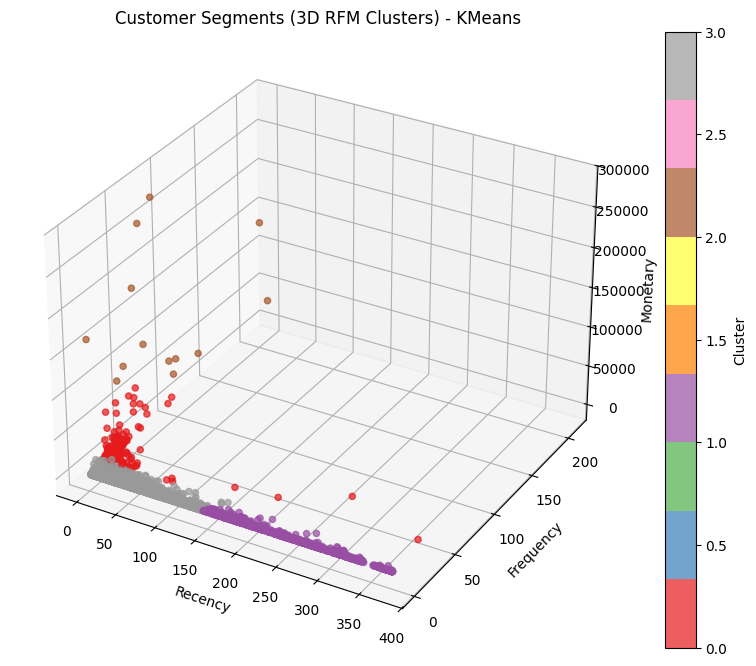

In [147]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    rfm['Recency'],
    rfm['Frequency'],
    rfm['Monetary'],
    c=rfm['Cluster'],
    cmap='Set1',
    alpha=0.7
)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title("Customer Segments (3D RFM Clusters) - KMeans")
plt.colorbar(scatter, label='Cluster')
plt.show()


# Recommendation System Approach:


In [148]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load data
df = pd.read_csv('online_retail.csv', encoding='latin1')

# Preprocessing:
# Remove cancelled transactions (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Aggregate purchases by CustomerID and StockCode (or Description)
# Here we use Description for product name; StockCode can also be used.
df = df.dropna(subset=['CustomerID', 'Description'])
df['Quantity'] = df['Quantity'].clip(lower=0)  # Remove negative quantities if any

# Create a customer-product matrix
customer_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Compute cosine similarity between products (columns)
product_similarity = cosine_similarity(customer_product_matrix.T)
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=customer_product_matrix.columns,
    columns=customer_product_matrix.columns
)

def get_top_similar_products(product_name, top_n=5):
    """
    Given a product description, return the top N most similar products.
    """
    if product_name not in product_similarity_df.columns:
        return f"Product '{product_name}' not found in product list."

    # Retrieve similarity scores for the input product
    similarity_scores = product_similarity_df[product_name]

    # Exclude the input product itself and sort by similarity
    top_products = similarity_scores.drop(product_name).sort_values(ascending=False).head(top_n)

    return top_products

# Example usage:
input_product = "WHITE HANGING HEART T-LIGHT HOLDER"  # Replace with any valid product description
top_similar = get_top_similar_products(input_product, top_n=5)

print(f"Top 5 products similar to '{input_product}':")
print(top_similar)


Top 5 products similar to 'WHITE HANGING HEART T-LIGHT HOLDER':
Description
GIN + TONIC DIET METAL SIGN         0.750410
RED HANGING HEART T-LIGHT HOLDER    0.658719
WASHROOM METAL SIGN                 0.643500
LAUNDRY 15C METAL SIGN              0.642206
GREEN VINTAGE SPOT BEAKER           0.631461
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64


In [149]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset
df = pd.read_csv('online_retail.csv', encoding='latin1')

# Preprocessing: Remove cancelled transactions
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df.dropna(subset=['CustomerID', 'Description'])
df['Quantity'] = df['Quantity'].clip(lower=0)  # Remove negative purchases

# Create the customer-product matrix
customer_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Compute cosine similarity between products
from sklearn.metrics.pairwise import cosine_similarity
product_similarity = cosine_similarity(customer_product_matrix.T)
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=customer_product_matrix.columns,
    columns=customer_product_matrix.columns
)

# Save the similarity DataFrame to a pickle file for later use in your Streamlit app
product_similarity_df.to_pickle('product_similarity_df.pkl')
print("product_similarity_df.pkl created successfully.")


product_similarity_df.pkl created successfully.


In [150]:
import pandas as pd

# Load dataset
df = pd.read_csv('online_retail.csv', encoding='latin1')

# Clean data: remove cancelled transactions (Invoice starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Drop rows with missing CustomerID or Description
df = df.dropna(subset=['CustomerID', 'Description'])

# Optional: Remove negative quantities or returns if any
df['Quantity'] = df['Quantity'].clip(lower=0)

# Create the pivot table: customers x products
customer_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='Description',  # or use 'StockCode' if preferred
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Save the DataFrame for later use
customer_product_matrix.to_pickle('customer_product_matrix.pkl')
print("Saved customer_product_matrix.pkl successfully.")


Saved customer_product_matrix.pkl successfully.


In [151]:
import pandas as pd

# Load dataset
df = pd.read_csv('online_retail.csv', encoding='latin1')

# Remove cancelled transactions
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Drop rows with missing StockCode or Description
df = df.dropna(subset=['StockCode', 'Description'])

# Create mapping dictionary: StockCode -> Description
stockcode_to_name = df.drop_duplicates(subset='StockCode').set_index('StockCode')['Description'].to_dict()

# Save dict to a pickle file
import pickle
with open('stockcode_to_name.pkl', 'wb') as f:
    pickle.dump(stockcode_to_name, f)

print("stockcode_to_name.pkl created successfully.")


stockcode_to_name.pkl created successfully.


In [152]:
! pip install streamlit -q


In [153]:
!wget -q -O - ipv4.icanhazip.com

35.185.43.120


In [154]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.185.43.120:8501

⠼⠴⠦⠧⠇⠏⠋⠙your url is: https://weak-towns-pull.loca.lt
  Stopping...
^C


# **Conclusion**

The Shopper Spectrum project demonstrates the power of leveraging e-commerce transaction data to gain actionable insights into customer purchasing behaviors and improve business outcomes. By applying RFM (Recency, Frequency, Monetary) analysis, the project successfully segments customers into meaningful groups such as High-Value, Regular, Occasional, and At-Risk, allowing targeted marketing and personalized engagement strategies.

The integration of an item-based collaborative filtering recommendation system, driven by product purchase histories and cosine similarity computations, enables the delivery of relevant product suggestions. This personalized recommendation enhances the user shopping experience and drives cross-selling opportunities.

Through rigorous exploratory data analysis, clustering, and model evaluation techniques (including the Elbow method and Silhouette scores), the project identifies optimal customer segments and ensures robust predictive performance. The modular design facilitates deployment in interactive environments like Streamlit, empowering business stakeholders with easy-to-use tools for both customer segmentation and product recommendation.

Overall, this dual approach—combining customer segmentation with collaborative filtering recommendations—enables e-commerce platforms to foster stronger customer loyalty, improve marketing efficiency, and enhance revenue growth in an increasingly competitive digital marketplace.